## Polynomial Regression 多項式回帰
### Steps
1. Feature transformation:
    - Eg. x -> [x1, x2, x3]
2. Model training
3. Model evaluation

### Advantages
- capture non-linear relationships 

### Limitations
- prone to overfitting with high-degree polynomials
--> may require regularization to overfitting

### Use case
- Growth patterns in biological systems where relationships are non-linear

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
# Generate synthetic data
np.random.seed(42)

X = np.random.rand(100, 1) * 10
y = 3 * X**2 + 2 * X + 1 + np.random.randn(100, 1) * 10

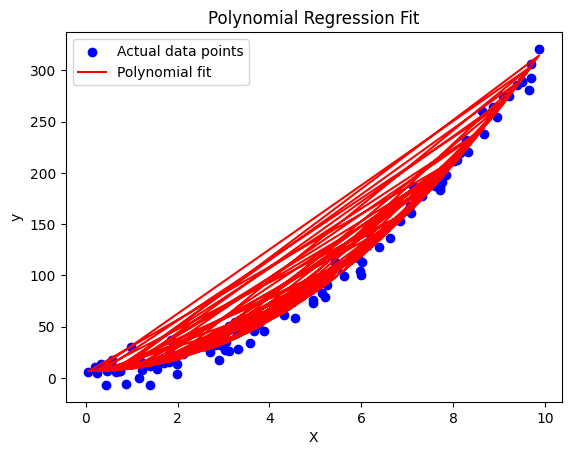

In [9]:
# Transform features to polynomial features

poly_features = PolynomialFeatures(degree=2, include_bias=False)
"""
If the original dataset contains columns [a,b], 
    this code will generate: a, b, a**2, b**2, a*b
    'degree=3' would generate: a, b, a**2, b**2, a*b, a**3, b**3, a**2*b, a*b**2
"""

X_poly = poly_features.fit_transform(X)

# Fit a polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Make predictions
y_pred = model.predict(X_poly)

# Plot the results
plt.scatter(X, y, color='blue', label='Actual data points')
plt.plot(X, y_pred, color='red', label='Polynomial fit')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression Fit')
plt.legend()
plt.show()

In [10]:
# Evaluate the model
mse = mean_squared_error(y, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 77.71936663502368
Mean Squared Error: 77.72


## Regularization 正則化
Technique used to **prevent overfitting** by adding a penalty term to the cost function of a regression model
- the regularization *parameter λ (lambda)* (also referred to as *'alpha'*):
    - when it's high -> increase the penalty, forcing smaller coefficients and reducing overfitting
    - when it's low -> allow the model to fit the training data more closely, increasing the risk of overfitting

### Ridge Regression (L2 Regularization)
- Add the sum of the squared coefficients to the cost function
### Lasso Regression (L1 Regularization)
- Add the sum of the absolute coefficients to the cost function

### Key differences
- *Ridge* shrinks coefficient but does not eliminate them
- *Lasso* can shrink some coefficients to zero, removing irrelevant features

In [12]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split

X_train, X_text, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [13]:
# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_text)

# Lasso Regression
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_text)

In [15]:
# Evaluate the model
ridge_model_mse = mean_squared_error(y_test, ridge_pred)
lasso_model_mse = mean_squared_error(y_test, lasso_pred)
print(f'Ridge Mean Squared Error: {ridge_model_mse:.2f}')
print(f'Lasso Mean Squared Error: {lasso_model_mse:.2f}')

Ridge Mean Squared Error: 63.58
Lasso Mean Squared Error: 63.73


## Exercise 1 - Predict House Value from Income using California Housing Data

In [16]:
from sklearn.datasets import fetch_california_housing

In [18]:
# Load California housing dataset
data = fetch_california_housing(as_frame=True)
df = data.frame
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [31]:
# Load California housing dataset
data = fetch_california_housing(as_frame=True)
    # `as_frame=False` would return a numpy array instead of a pandas DataFrame

df = data.frame

| Argument                  | `as_frame=False` (Default)                             | `as_frame=True`                                |
|---------------------------|------------------------------------------------------|-----------------------------------------------|
| data                      | NumPy ndarray                                        | pandas DataFrame                              |
| target                    | NumPy ndarray                                        | pandas Series/DataFrame                       |
| Column Names              | `feature_names` attribute                            | DataFrame columns                             |
| `frame` Attribute           | Not present                                          | pandas DataFrame (features + target)          |
| Best For                  | Numeric computation (NumPy-based)                    | Data analysis, DataFrame manipulation         |


In [33]:
print(data.data.shape)      # (20640, 8)
print(data.frame.shape)     # (20640, 9) (features + target)
print(f"Feature names: {data.feature_names}")
print(f"Traget name: {data.target_names}")

(20640, 8)
(20640, 9)
Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Traget name: ['MedHouseVal']


In [37]:
# Select feature (Median Income) and target (Median House Value)
X = df[['MedInc']]
y = df[['MedHouseVal']]

X[0:5], y[0:5]  # Display first 5 rows of X and y

(   MedInc
 0  8.3252
 1  8.3014
 2  7.2574
 3  5.6431
 4  3.8462,
    MedHouseVal
 0        4.526
 1        3.585
 2        3.521
 3        3.413
 4        3.422)

In [ ]:
# Experiment with `as_frame=False`
data_np = fetch_california_housing(as_frame=False)
df_np = data_np.data

X_np = df[['MedInc']].values
y_np = df[['MedHouseVal']].values

X_np[0:5], y_np[0:5]  # Display first 5 rows of X and y

(array([[8.3252],
        [8.3014],
        [7.2574],
        [5.6431],
        [3.8462]]),
 array([[4.526],
        [3.585],
        [3.521],
        [3.413],
        [3.422]]))

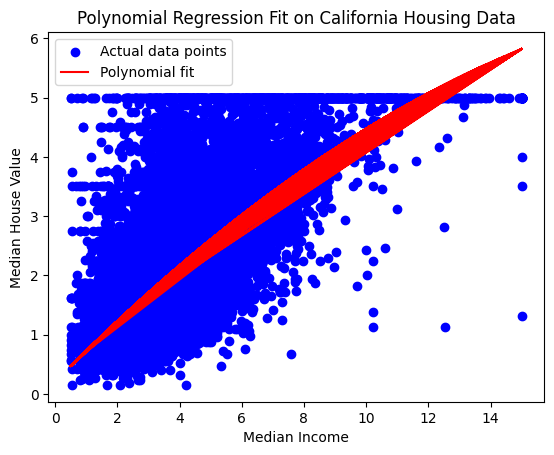

Mean Squared Error: 0.70


In [39]:
# Transform features to polynomial features
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Fit polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Make predictions
y_pred = model.predict(X_poly)

# Plot the results
plt.scatter(X, y, color='blue', label='Actual data points')
plt.plot(X, y_pred, color='red', label='Polynomial fit')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Polynomial Regression Fit on California Housing Data')
plt.legend()
plt.show()

# Evaluate the model
mse = mean_squared_error(y, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

## Exercise 2 - Apply Ridge and Lasso Regression

Ridge Mean Squared Error: 0.70
Lasso Mean Squared Error: 0.82


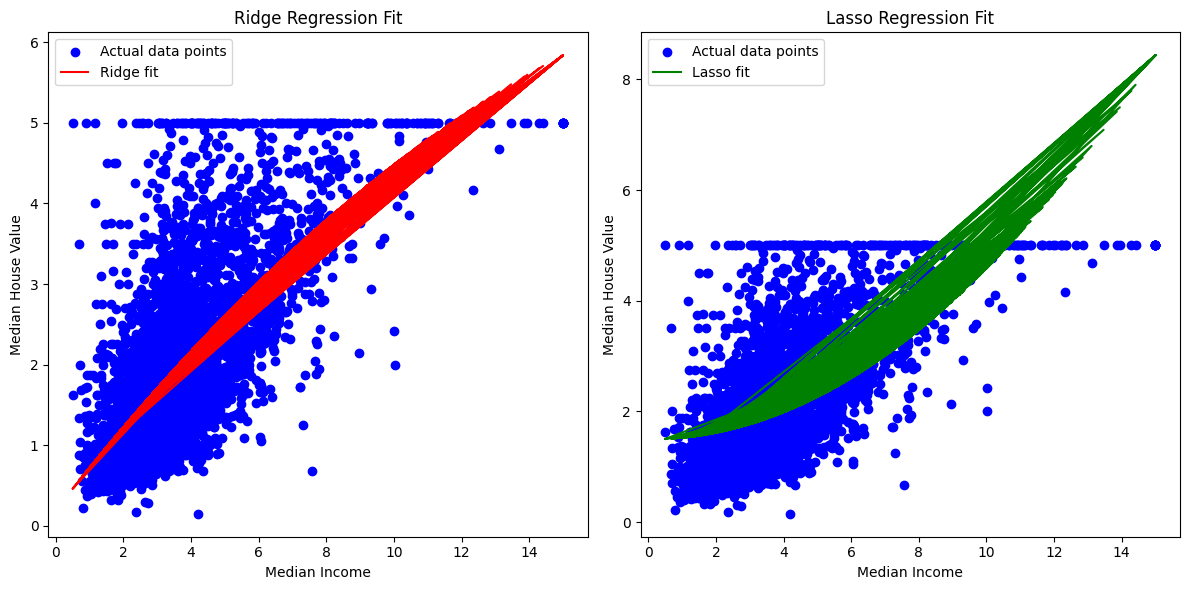

In [ ]:
# Apply Ridge and Lasso regression
from sklearn.linear_model import Lasso, Ridge

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)

lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)

# Evaluate the models
ridge_model_mse = mean_squared_error(y_test, ridge_pred)
lasso_model_mse = mean_squared_error(y_test, lasso_pred)
print(f'Ridge Mean Squared Error: {ridge_model_mse:.2f}')
print(f'Lasso Mean Squared Error: {lasso_model_mse:.2f}')

# Visualize the models
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 0], y_test, color='blue', label='Actual data points')
plt.plot(X_test[:, 0], ridge_pred, color='red', label='Ridge fit')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Ridge Regression Fit')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], y_test, color='blue', label='Actual data points')
plt.plot(X_test[:, 0], lasso_pred, color='green', label='Lasso fit')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Lasso Regression Fit')
plt.legend()

plt.tight_layout()
plt.show()

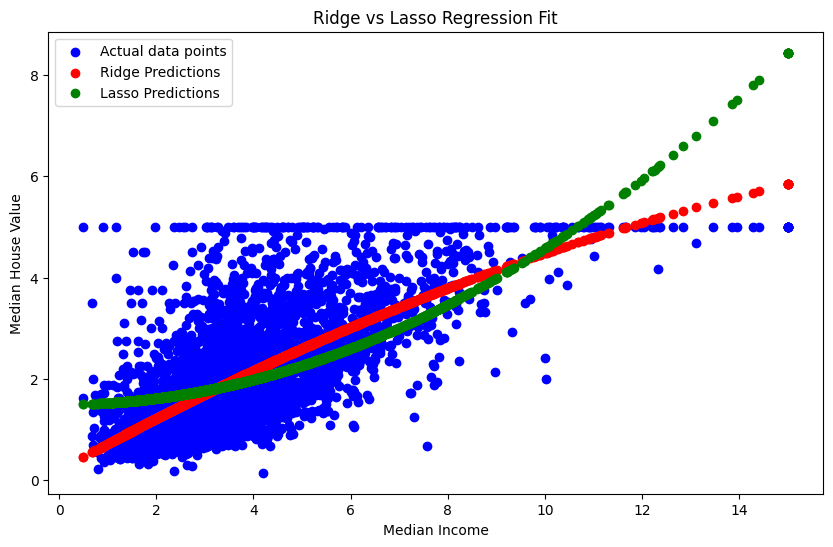

In [44]:
# Visualize Ridge vs Lasso models
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], y_test, color='blue', label='Actual data points')
plt.scatter(X_test[:, 0], ridge_pred, color='red', label='Ridge Predictions')
plt.scatter(X_test[:, 0], lasso_pred, color='green', label='Lasso Predictions')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Ridge vs Lasso Regression Fit')
plt.legend()
plt.show()